# Linear Classification


## Executive Summary

I worked with the Breast Cancer Wisconsin Diagnostic Dataset to classify tumors as either benign or malignant using two machine learning models: Logistic Regression and SVM with an RBF kernel. I began by preprocessing the dataset, encoding the diagnosis column to represent malignant cases as 1 and benign cases as 0. After that, I split the dataset into training and test sets (80% training, 20% testing) and standardized the feature set to ensure optimal model performance. 

The Logistic Regression model was trained and achieved an accuracy of 97.37%, with a precision of 97.56%, recall of 95.24%, and an F1 score of 96.39%. Similarly, the SVM model was trained, which slightly outperformed Logistic Regression with an accuracy of 98.25%, a perfect precision of 100%, recall of 95.24%, and an F1 score of 97.56%. Both models performed exceptionally well, but SVM stood out due to its perfect precision, meaning it made no false positive predictions. I visualized the performance of both models using confusion matrices, showing their correct and incorrect classifications. 

This allowed me to analyze how both models handled true positives and false positives. Although Logistic Regression had excellent performance, SVM was slightly superior in terms of precision and overall accuracy. Overall, while both models achieved high accuracy and recall, SVM performed marginally better, especially in precision, making it the preferable model in this scenario.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Define the column names for the dataset
column_names = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
    'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

# Load the dataset from the uploaded file
df = pd.read_csv(r'C:\Users\dccan\OneDrive\Desktop\Lab-2\wdbc.data', header=None, names=column_names)
df

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Data Understanding Steps:

In [3]:
# It reprsents the number of columns presented in the data.
df.columns

Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# It generates the shape of the DataFrame.
df.shape

(569, 32)

In [5]:
# It shows the data types of the DataFrame's columns.
df.dtypes

ID                           int64
Diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [30]:
# Display basic statistical details of the DataFrame.
df.describe()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# It shows the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# It shows the initial five rows of the DataFrame for reviewing its structure and content.
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# It shows the final five rows of the DataFrame to review the end portion of the data.
df.tail()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
# Print the number of null values in each column.
df.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# Check unique values in the 'Diagnosis' column
print(df['Diagnosis'].unique())

['M' 'B']


In [12]:
# Correct encoding of 'Diagnosis' column (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Verify encoding
print(df['Diagnosis'].value_counts())

Diagnosis
0    357
1    212
Name: count, dtype: int64


In [13]:
# Print the outputs_
print(df['Diagnosis'].value_counts())
print(df.info())

Diagnosis
0    357
1    212
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               5

### Observation:
The above one tells the process begins by identifying the unique values in the Diagnosis column, with 'M' representing malignant and 'B' representing benign cases. These values are then converted into numerical format, with 1 indicating malignant and 0 indicating benign. The next step confirms the distribution of the data, showing 357 benign cases and 212 malignant cases. A summary of the dataset is also generated, providing details on column names, data types, and the number of entries. This transformation is crucial to prepare the target variable for analysis and modeling.

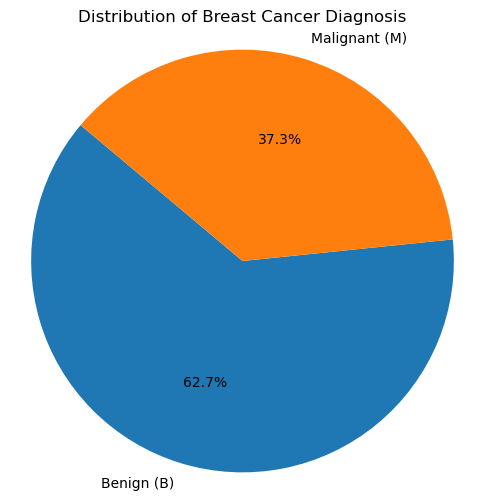

In [14]:
# Count the occurrences of each target variable
diagnosis_counts = df['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=['Benign (B)', 'Malignant (M)'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Breast Cancer Diagnosis')

# Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# It shows the pie chart
plt.show()

### Observation:
The above pie chart represents the distribution of breast cancer diagnosis in the dataset, where the majority of the cases are benign (62.7%), shown in blue, while malignant cases make up 37.3%, shown in orange. This indicates that benign cases are nearly two-thirds of the total dataset, making them more frequent than malignant ones. The clear distinction between the two segments provides a quick visual understanding of the class imbalance in the dataset, which is important to consider during model training to ensure proper handling of both classes.

In [15]:
# Split features (X) and target (y)
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']

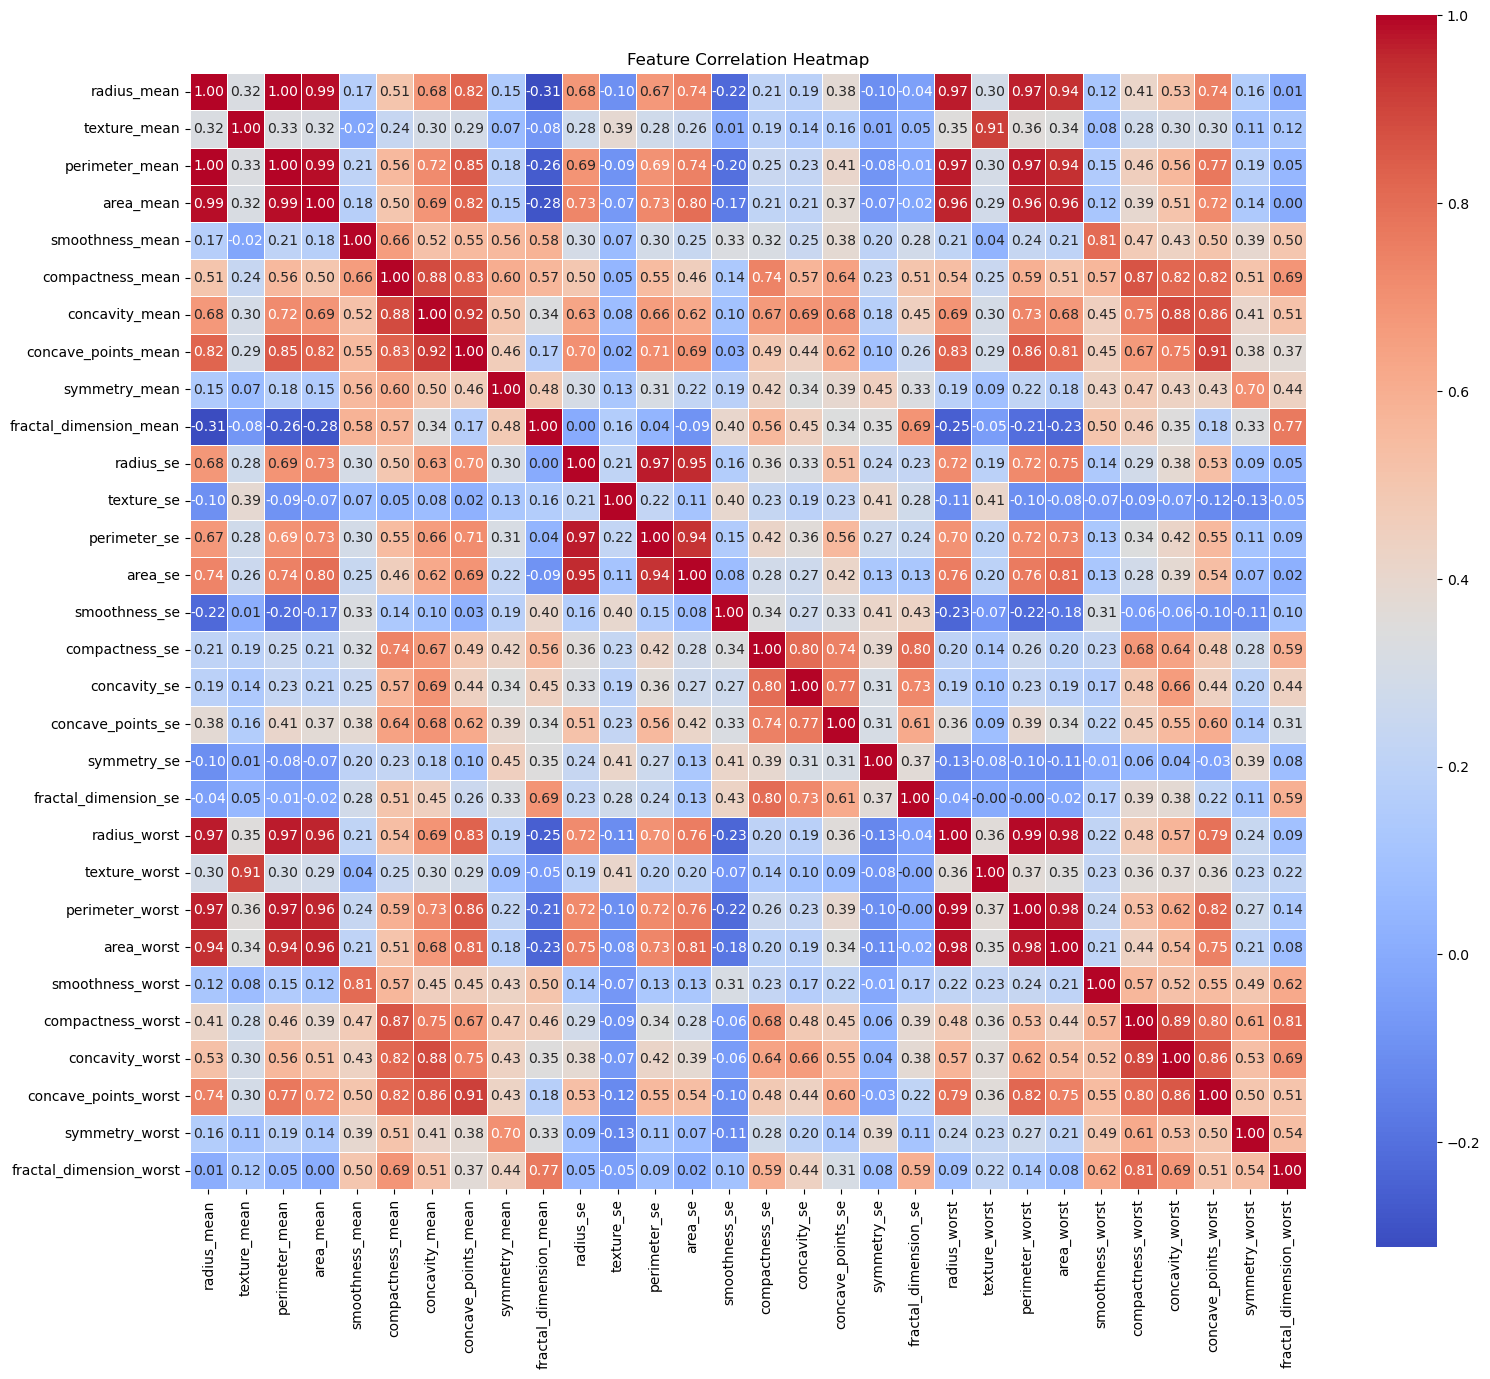

In [16]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')

# It shows the heat map
plt.show()

### Observation:
The above heatmap shows that certain features, like radius, perimeter, and area, are strongly related, meaning they provide similar information. Some features, such as fractal dimension, have weak relationships with others, indicating they might offer unique insights. The diagonal values represent each feature's perfect relationship with itself. There are also patterns where features measured in different ways, like mean and worst values, have strong connections. This analysis can help identify which features might be repetitive and could be removed to simplify and improve models.

In [17]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Instantiate the Logistic Regression model for feature selection
logistic_model_fs = LogisticRegression(max_iter=10000, random_state=42)

# Apply Sequential Feature Selection (Forward Selection)
sfs = SequentialFeatureSelector(logistic_model_fs, n_features_to_select=10, direction='forward')
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]

# Update X_train and X_test with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display selected features
print(f"Selected Features for logistic: {list(selected_features)}")

Selected Features for logistic: ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'radius_worst', 'texture_worst', 'compactness_worst', 'concavity_worst']


### Observation:
The above one uses Sequential Feature Selection (SFS) with Logistic Regression to select the 10 most important features. The forward selection approach adds features that improve model performance step by step. Once the top features are selected, the training and test sets are updated to include only these features. The key selected features include texture_mean, smoothness_mean, and radius_worst, among others, for model training.

In [19]:
# Standardize the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Check the shapes
print(f"X_train shape: {X_train_scaled.shape}, X_test shape: {X_test_scaled.shape}")

X_train shape: (455, 10), X_test shape: (114, 10)


In [20]:
# Train Logistic Regression on selected features
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [21]:
# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model and store metrics in a dictionary (focusing on Malignant class, pos_label=1)
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic, pos_label=1),
    "Recall": recall_score(y_test, y_pred_logistic, pos_label=1),
    "F1 Score": f1_score(y_test, y_pred_logistic, pos_label=1)
}

# Display the metrics
logistic_metrics

{'Accuracy': 0.9736842105263158,
 'Precision': 0.975609756097561,
 'Recall': 0.9523809523809523,
 'F1 Score': 0.963855421686747}

### Observation:

In te above one, the Logistic Regression model is used to predict the test set results, focusing on the malignant class (label = 1). The performance metrics, including accuracy, precision, recall, and F1-score, are evaluated. The accuracy achieved is 97.37%, with a precision of 97.56% and recall of 95.24%, indicating a good ability to correctly identify malignant cases. The F1-score is 96.39%, demonstrating a strong balance between precision and recall.

In [22]:
# Instantiate the SVM model for feature selection
svm_model_fs = SVC(kernel='rbf', random_state=42)

# Apply Sequential Feature Selection (Forward Selection)
sfs_svm = SequentialFeatureSelector(svm_model_fs, n_features_to_select=10, direction='forward')
sfs_svm.fit(X_train, y_train)

# Get the selected features
selected_features_svm = X.columns[sfs_svm.get_support()]

# Update X_train and X_test with selected features for SVM
X_train_selected_svm = X_train[selected_features_svm]
X_test_selected_svm = X_test[selected_features_svm]

# Display selected features
print(f"Selected Features for SVM: {list(selected_features_svm)}")

Selected Features for SVM: ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'perimeter_se', 'texture_worst', 'perimeter_worst']


In [23]:
# Train SVM with RBF kernel on selected features
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [24]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model and store metrics in a dictionary (focusing on Malignant class, pos_label=1)
svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, pos_label=1),
    "Recall": recall_score(y_test, y_pred_svm, pos_label=1),
    "F1 Score": f1_score(y_test, y_pred_svm, pos_label=1)
}

# Display the metrics
svm_metrics

{'Accuracy': 0.9824561403508771,
 'Precision': 1.0,
 'Recall': 0.9523809523809523,
 'F1 Score': 0.975609756097561}

### Observation:

The above one predicts the test set results using an SVM model and evaluates the performance metrics, focusing on the malignant class (label = 1). The metrics computed include accuracy, precision, recall, and F1-score. The results show an accuracy of 98.25%, perfect precision (1.0), and a recall of 95.24%, which means the model performs very well, especially in detecting malignant cases. The F1-score of 97.56% further indicates a strong balance between precision and recall. Similar to the logistic model but with slightly higher accuracy.

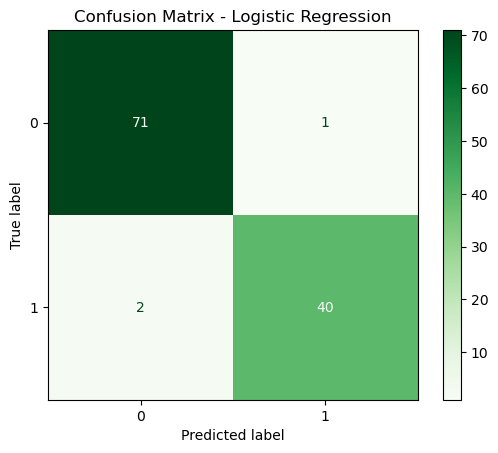

In [25]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_logistic)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')

# It shows the plot
plt.show()

### Observation:
    
This confusion matrix for Logistic Regression shows the model's performance in predicting the benign (0) and malignant (1) cases. The model correctly predicted 71 benign cases and misclassified 1 benign case as malignant. On the other hand, it accurately predicted 40 malignant cases but misclassified 2 malignant cases as benign. Overall, the confusion matrix indicates strong predictive performance, with only minor misclassifications for both classes.

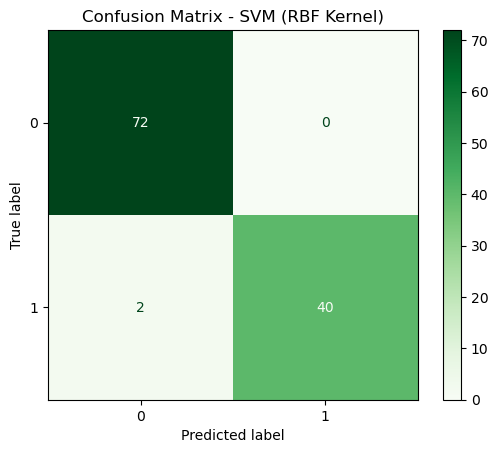

In [26]:
# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Greens')
plt.title('Confusion Matrix - SVM (RBF Kernel)')

# It shows the plot
plt.show()

### Observation:

This confusion matrix for SVM (RBF Kernel) shows the model's performance in predicting the benign (0) and malignant (1) cases. The model correctly predicted 72 benign cases and did not misclassify any benign cases as malignant. However, it accurately predicted 40 malignant cases but misclassified 2 malignant cases as benign. Overall, the SVM model slightly outperformed Logistic Regression in identifying benign cases while maintaining a similar performance in predicting malignant cases, with only a minor misclassification of malignant cases.

In [27]:
# Logistic Regression Metrics
lr_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic, pos_label=1),
    "Recall": recall_score(y_test, y_pred_logistic, pos_label=1),
    "F1 Score": f1_score(y_test, y_pred_logistic, pos_label=1)
}

# Predict on the test set for SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# SVM Metrics
svm_metrics = {
    "Model": "SVM (RBF Kernel)",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, pos_label=1),
    "Recall": recall_score(y_test, y_pred_svm, pos_label=1),
    "F1 Score": f1_score(y_test, y_pred_svm, pos_label=1)
}

# Create DataFrame for comparison
metrics_df = pd.DataFrame([lr_metrics, svm_metrics])

# Display the DataFrame
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684    0.97561  0.952381  0.963855
1     SVM (RBF Kernel)  0.982456    1.00000  0.952381  0.975610


### Observation:

This table compares the performance of Logistic Regression and SVM with the RBF kernel on the same dataset. Both models achieve very high accuracy, with SVM slightly outperforming Logistic Regression (98.2% vs. 97.4%). SVM achieves a perfect precision score of 1.0, meaning it had no false positives, while Logistic Regression's precision is slightly lower at 0.976. Both models have the same recall score of 0.952, indicating they correctly identified the same number of positive cases. SVM has a marginally better F1 score (0.976) compared to Logistic Regression's F1 score of 0.964, reflecting its overall stronger performance in balancing precision and recall.

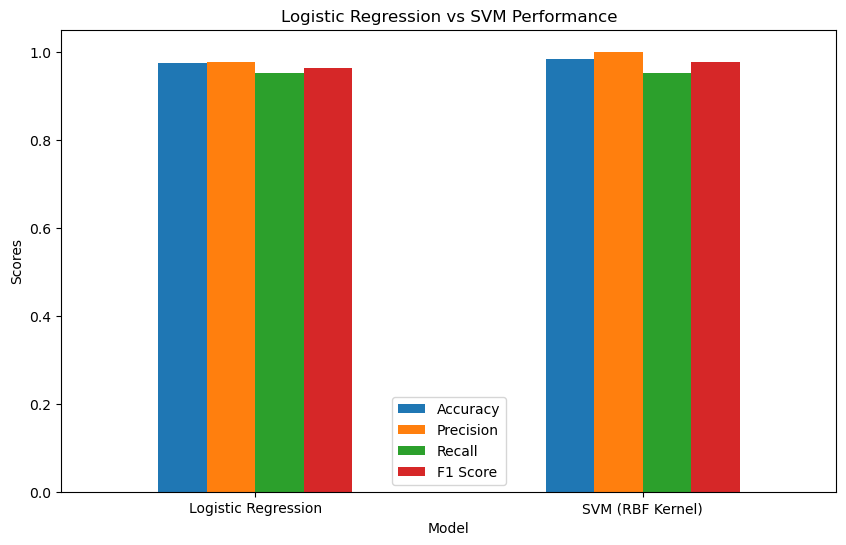

In [28]:
# Plot comparison of the metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Logistic Regression vs SVM Performance")
plt.ylabel("Scores")
plt.xticks(rotation=0)

# It shows the bar chart
plt.show()

### Observation:
    
This bar chart compares the performance of Logistic Regression and SVM (RBF Kernel) across four key metrics: accuracy, precision, recall, and F1 score. Both models show very high scores, with all metrics exceeding 0.9. SVM slightly outperforms Logistic Regression in all metrics, especially in precision where SVM achieves a perfect score of 1.0, indicating no false positives. Logistic Regression has a slightly lower F1 score compared to SVM, reflecting a minor trade-off between precision and recall. Overall, SVM has a slight edge in performance, making it the stronger model for this dataset.

### Recommendation and Improve the model Performance:

Based on the results, the SVM model with an RBF kernel is slightly better than Logistic Regression, particularly in terms of precision and F1 score, making it a better choice for detecting malignant cases in cancer diagnosis. The SVM model had perfect precision, meaning no false positives, which is crucial for this application.

To improve the model, consider using PCA (Principal Component Analysis) for dimensionality reduction to remove noise and enhance efficiency. Address class imbalance, if present, by applying techniques like SMOTE or cost-sensitive learning. You can also try model ensembling (e.g., Random Forest, XGBoost) to combine strengths of different algorithms. Fine-tuning hyperparameters with grid search or random search may yield better results. Lastly, ensure the model generalizes well by using cross-validation to avoid overfitting.